<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.756990,69.358821,75.223785,-29.449063,198.890534,230.170343,-31.279810
1,0.0,1.0,65.334359,27.770059,67.842332,19.843897,190.790646,168.701681,22.088965
2,0.0,2.0,89.582632,74.508347,31.234771,15.349045,220.674795,204.631396,16.043399
3,0.0,3.0,50.926867,20.096008,84.581953,3.829905,169.434733,164.744669,4.690064
4,0.0,4.0,28.461799,34.448529,59.436009,2.396207,134.742544,135.604717,-0.862173
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.474665,61.637729,97.171628,13.726775,259.010797,245.450032,13.560765
249996,999.0,246.0,95.340605,34.612337,42.378151,-19.204240,163.126853,187.054810,-23.927956
249997,999.0,247.0,84.983241,33.136054,27.934271,-32.512369,123.541198,160.437426,-36.896228
249998,999.0,248.0,59.214164,69.355966,97.294228,-38.276345,197.588013,234.298110,-36.710096


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.756990  69.358821  75.223785  ...  198.890534  230.170343 -31.279810
      1.0    65.334359  27.770059  67.842332  ...  190.790646  168.701681  22.088965
      2.0    89.582632  74.508347  31.234771  ...  220.674795  204.631396  16.043399
      3.0    50.926867  20.096008  84.581953  ...  169.434733  164.744669   4.690064
      4.0    28.461799  34.448529  59.436009  ...  134.742544  135.604717  -0.862173
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  76.474665  61.637729  97.171628  ...  259.010797  245.450032  13.560765
      246.0  95.340605  34.612337  42.378151  ...  163.126853  187.054810 -23.927956
      247.0  84.983241  33.136054  27.934271  ...  123.541198  160.437426 -36.896228
      248.0  59.214164  69.355966  97.294228  ...  197.588013  234.298110 -36.710096
      249.0  75.678303  61.306817  42.302740  ...  184.675865  192.172170  -7.496305

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.756990  69.358821  75.223785  ...  198.890534  230.170343 -31.279810
      1.0    65.334359  27.770059  67.842332  ...  190.790646  168.701681  22.088965
      2.0    89.582632  74.508347  31.234771  ...  220.674795  204.631396  16.043399
      3.0    50.926867  20.096008  84.581953  ...  169.434733  164.744669   4.690064
      4.0    28.461799  34.448529  59.436009  ...  134.742544  135.604717  -0.862173
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  76.474665  61.637729  97.171628  ...  259.010797  245.450032  13.560765
      246.0  95.340605  34.612337  42.378151  ...  163.126853  187.054810 -23.927956
      247.0  84.983241  33.136054  27.934271  ...  123.541198  160.437426 -36.896228
      248.0  59.214164  69.355966  97.294228  ...  197.588013  234.298110 -36.710096
      249.0  75.678303  61.306817  42.302740  ...  184.675865  192.172170  -7.496305

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.756990,69.358821,75.223785,-29.449063,198.890534,230.170343,-31.279810
1,0.0,1.0,65.334359,27.770059,67.842332,19.843897,190.790646,168.701681,22.088965
2,0.0,2.0,89.582632,74.508347,31.234771,15.349045,220.674795,204.631396,16.043399
3,0.0,3.0,50.926867,20.096008,84.581953,3.829905,169.434733,164.744669,4.690064
4,0.0,4.0,28.461799,34.448529,59.436009,2.396207,134.742544,135.604717,-0.862173
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,76.474665,61.637729,97.171628,13.726775,259.010797,245.450032,13.560765
249996,999.0,246.0,95.340605,34.612337,42.378151,-19.204240,163.126853,187.054810,-23.927956
249997,999.0,247.0,84.983241,33.136054,27.934271,-32.512369,123.541198,160.437426,-36.896228
249998,999.0,248.0,59.214164,69.355966,97.294228,-38.276345,197.588013,234.298110,-36.710096


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat      e_hat
rep   index                                   ...                                   
0.0   0.0    73.756990  69.358821  75.223785  ...  198.890534  230.170343 -31.279810
      1.0    65.334359  27.770059  67.842332  ...  190.790646  168.701681  22.088965
      2.0    89.582632  74.508347  31.234771  ...  220.674795  204.631396  16.043399
      3.0    50.926867  20.096008  84.581953  ...  169.434733  164.744669   4.690064
      4.0    28.461799  34.448529  59.436009  ...  134.742544  135.604717  -0.862173
...                ...        ...        ...  ...         ...         ...        ...
999.0 245.0  76.474665  61.637729  97.171628  ...  259.010797  245.450032  13.560765
      246.0  95.340605  34.612337  42.378151  ...  163.126853  187.054810 -23.927956
      247.0  84.983241  33.136054  27.934271  ...  123.541198  160.437426 -36.896228
      248.0  59.214164  69.355966  97.294228  ...  197.588013  234.298110 -36.710096
      249.0  75.678303  61.306817  42.302740  ...  184.675865  192.172170  -7.496305

[250000 rows x 7 columns]

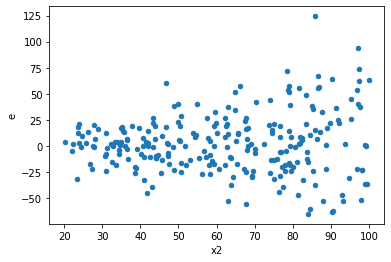

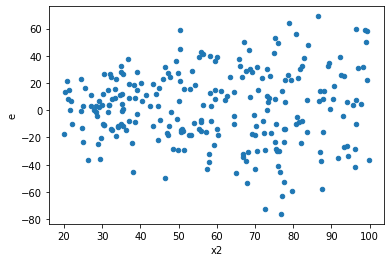

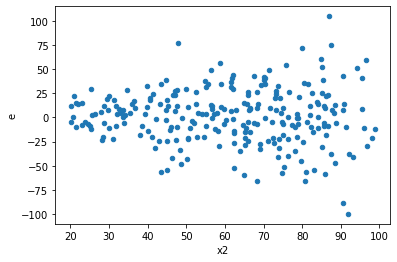

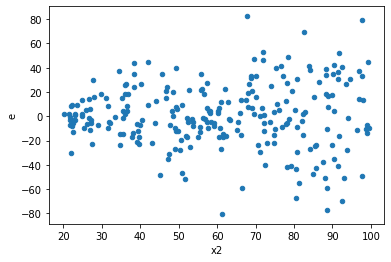

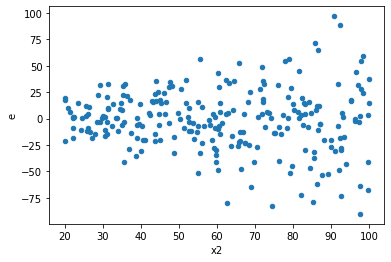

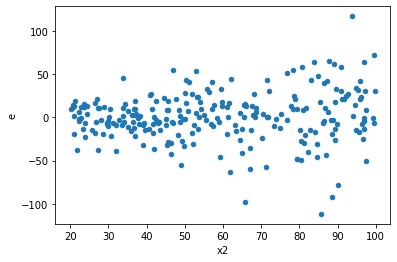

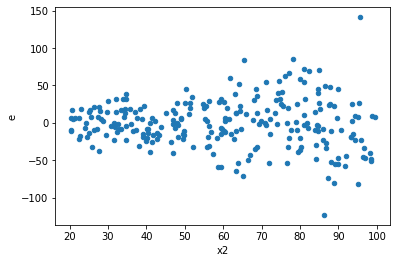

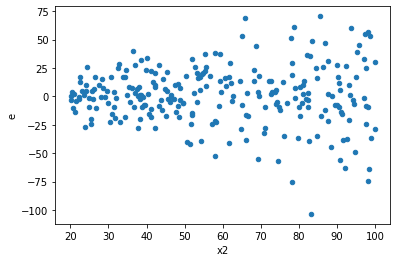

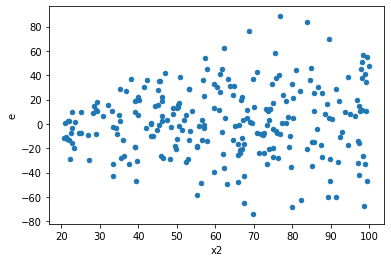

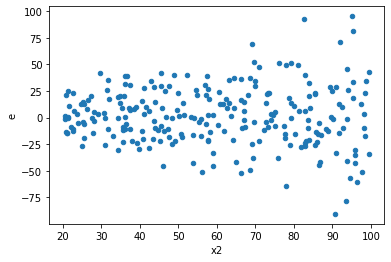

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,116.0,128.0,44213.906110276825,126822.27127666502,381.1543630196278,990.7989943489455,2.599469114034315,1.9337291545795665e-07,0.9999999033135423,9.668645772897833e-08,Reject001=0 : Heteroscedasticity
5.0,118.0,126.0,71825.44418659221,127890.95176384873,608.6902049711205,1015.0075536813391,1.6675273322814461,0.004933973117649648,0.9975330134411752,0.002466986558824824,Reject001=0 : Heteroscedasticity
8.0,117.0,127.0,74021.73502133026,124476.95232774765,632.6644018917116,980.1334828956508,1.5492154765859782,0.0159230244080657,0.9920384877959671,0.00796151220403285,Reject001=1 : Homoscedasticity
9.0,119.0,125.0,49817.17170000087,134028.83397219187,418.63169495799053,1072.230671777535,2.5612744679667236,3.198650093683142e-07,0.9999998400674953,1.599325046841571e-07,Reject001=0 : Heteroscedasticity
12.0,115.0,129.0,60733.34841058765,111198.88668030141,528.1160731355448,862.0068734907086,1.6322299534887823,0.006965058887713482,0.9965174705561433,0.003482529443856741,Reject001=0 : Heteroscedasticity
13.0,106.0,138.0,51528.63265932259,111768.42519695575,486.1191760313452,809.9161246156214,1.666085529124236,0.0049042914584935815,0.9975478542707532,0.0024521457292467908,Reject001=0 : Heteroscedasticity
16.0,114.0,130.0,55386.72337035449,93952.70236691339,485.84845061714464,722.713095130103,1.4875278375635101,0.028507384299353733,0.9857463078503231,0.014253692149676866,Reject001=1 : Homoscedasticity
20.0,109.0,135.0,54368.423477333214,119478.31631521865,498.7928759388368,885.0245652979158,1.7743328102513631,0.0015807477992035857,0.9992096261003982,0.0007903738996017928,Reject001=0 : Heteroscedasticity
23.0,125.0,119.0,54711.706959193994,123350.44097583671,437.693655673552,1036.5583275280396,2.368227901162778,3.125105437318254e-06,0.9999984374472813,1.562552718659127e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,110.0,134.0,127981.65374419262,66286.2751322709,1163.4695794926602,494.67369501694697,0.42517114648812154,5.225401129892726e-06,Reject001=0 : Heteroscedasticity
1.0,120.0,124.0,106582.93203894244,71438.89213085678,888.1911003245203,576.1200978294902,0.6486443037078303,0.017671357873954404,Reject001=1 : Homoscedasticity
2.0,118.0,126.0,100330.48983002215,102211.85562275918,850.2583883900182,811.2052033552316,0.9540690388145012,0.7972248124547288,Reject001=1 : Homoscedasticity
3.0,116.0,128.0,44213.906110276825,126822.27127666502,381.1543630196278,990.7989943489455,2.599469114034315,1.9337291545795665e-07,Reject001=0 : Heteroscedasticity
4.0,124.0,120.0,136212.5425115532,65754.89327523598,1098.488246060913,547.9574439602999,0.498828681986566,0.00014289662989905424,Reject001=0 : Heteroscedasticity
5.0,118.0,126.0,71825.44418659221,127890.95176384873,608.6902049711205,1015.0075536813391,1.6675273322814461,0.004933973117649648,Reject001=0 : Heteroscedasticity
6.0,135.0,109.0,182718.8639828609,74989.26530340583,1353.4730665397103,687.9749110404205,0.5083033626958661,0.0001960278897508474,Reject001=0 : Heteroscedasticity
7.0,122.0,122.0,100697.9311077736,58222.2876220875,825.3928779325705,477.23186575481554,0.5781875256183182,0.0026916944239098583,Reject001=0 : Heteroscedasticity
8.0,117.0,127.0,74021.73502133026,124476.95232774765,632.6644018917116,980.1334828956508,1.5492154765859782,0.0159230244080657,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    664
Reject001=1 : Homoscedasticity      336
Name: Result_test, dtype: int64